In [1]:
import numpy as np
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

## tech value no short

In [2]:
data=pd.read_csv('C:/Users/herry/Desktop/optimization final graph/tech_value_noshort.csv',delimiter=';')
data

,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.021323,0.00,0.0000,0.0000,0.0000,0.8732,0.0000,0.0510,0.0000,0.0000,0.0000,0.0758
2,0.020459,0.01,0.0000,0.0000,0.0003,0.8240,0.0000,0.0834,0.0000,0.0000,0.0000,0.0922
3,0.019668,0.02,0.0000,0.0000,0.0170,0.7824,0.0000,0.1009,0.0000,0.0000,0.0000,0.0997
4,0.018917,0.03,0.0000,0.0000,0.0426,0.7448,0.0000,0.1101,0.0001,0.0000,0.0000,0.1024
...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.016883,0.76,0.3558,0.0003,0.0007,0.0000,0.1872,0.0097,0.0287,0.0516,0.3659,0.0000
78,0.017156,0.77,0.3637,0.0002,0.0004,0.0000,0.1850,0.0075,0.0279,0.0506,0.3646,0.0000
79,0.017430,0.78,0.3716,0.0002,0.0003,0.0000,0.1827,0.0054,0.0271,0.0495,0.3632,0.0000
80,0.017707,0.79,0.3795,0.0002,0.0002,0.0000,0.1803,0.0036,0.0263,0.0484,0.3616,0.0000


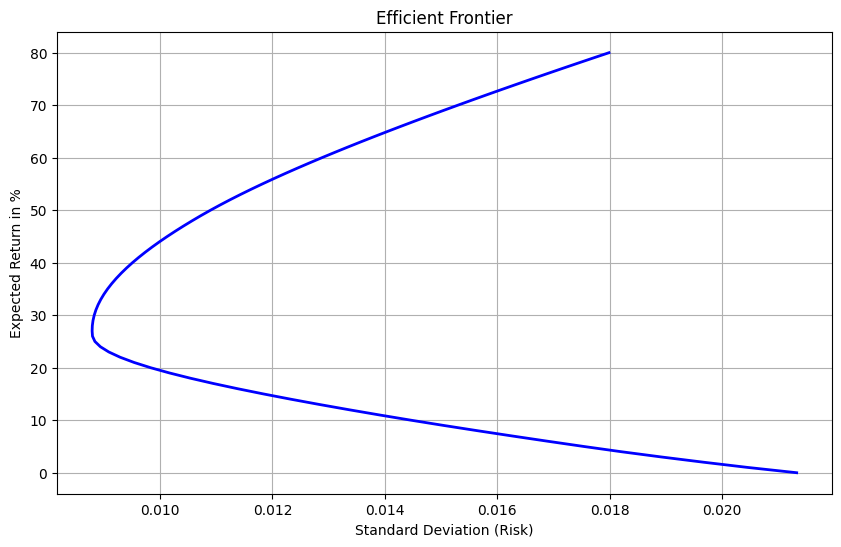

In [3]:
# Plotting the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(data['SDp'], data['ERp']*100, 'b-', linewidth=2)
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return in %')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()


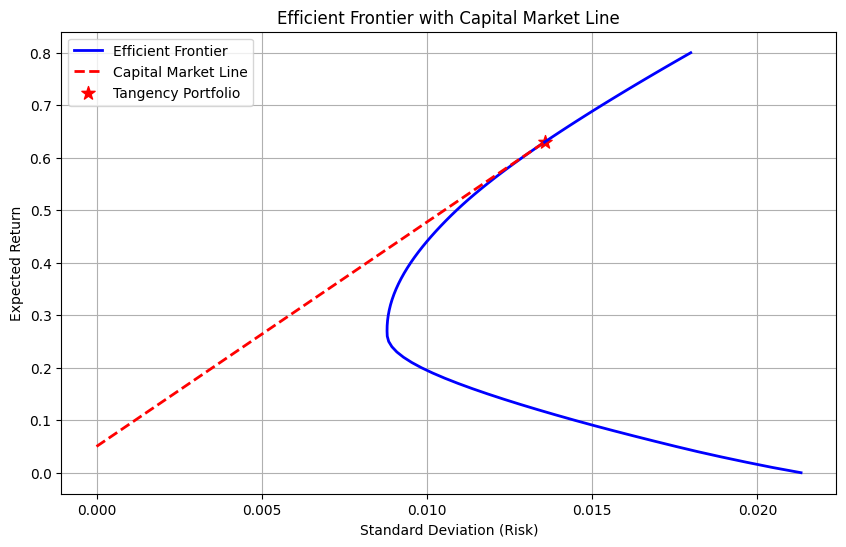

In [4]:
# Assuming 'risk_free_rate' is defined as the risk-free rate
risk_free_rate = 0.05

# Calculate the Sharpe ratio for each portfolio on the efficient frontier
data['SharpeRatio'] = (data['ERp'] - risk_free_rate) / (data['SDp'])

# Find the portfolio with the highest Sharpe ratio (tangency portfolio)
tangency_portfolio = data.loc[data['SharpeRatio'].idxmax()]

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(data['SDp'], data['ERp'], 'b-', linewidth=2, label='Efficient Frontier')

# Plot the Capital Market Line (CML)
cml_x = [0, tangency_portfolio['SDp']]
cml_y = [risk_free_rate, tangency_portfolio['ERp']]
plt.plot(cml_x, cml_y, 'r--', linewidth=2, label='Capital Market Line')

# Mark the tangency portfolio
plt.scatter(tangency_portfolio['SDp'], tangency_portfolio['ERp'], color='red', marker='*', s=100, label='Tangency Portfolio')

plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Capital Market Line')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
tangency_portfolio 

SDp             0.013568
ERp             0.630000
x1              0.254300
x2              0.001100
x3              0.025900
x4              0.000000
x5              0.209200
x6              0.036800
x7              0.037000
x8              0.061000
x9              0.374800
x10             0.000000
SharpeRatio    42.749086
Name: 64, dtype: float64

## Consumption growth short


In [6]:
data_short=pd.read_csv('C:/Users/herry/Desktop/optimization final graph/tech_value_short.csv',delimiter=';')
data_short

,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.011643,0.00,-0.1662,0.0108,0.1353,0.2713,0.1760,0.0926,0.0228,0.0692,0.3423,0.0459
2,0.011461,0.01,-0.1598,0.0107,0.1338,0.2657,0.1771,0.0920,0.0232,0.0692,0.3430,0.0451
3,0.011282,0.02,-0.1535,0.0107,0.1322,0.2602,0.1781,0.0914,0.0236,0.0692,0.3437,0.0443
4,0.011108,0.03,-0.1471,0.0106,0.1307,0.2546,0.1792,0.0908,0.0241,0.0692,0.3444,0.0436
...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.016320,0.76,0.3172,0.0053,0.0174,-0.1507,0.2563,0.0477,0.0551,0.0687,0.3971,-0.0140
78,0.016558,0.77,0.3236,0.0052,0.0159,-0.1563,0.2574,0.0471,0.0555,0.0687,0.3978,-0.0148
79,0.016797,0.78,0.3299,0.0051,0.0143,-0.1619,0.2584,0.0465,0.0559,0.0687,0.3985,-0.0156
80,0.017037,0.79,0.3363,0.0050,0.0128,-0.1674,0.2595,0.0459,0.0563,0.0686,0.3992,-0.0163


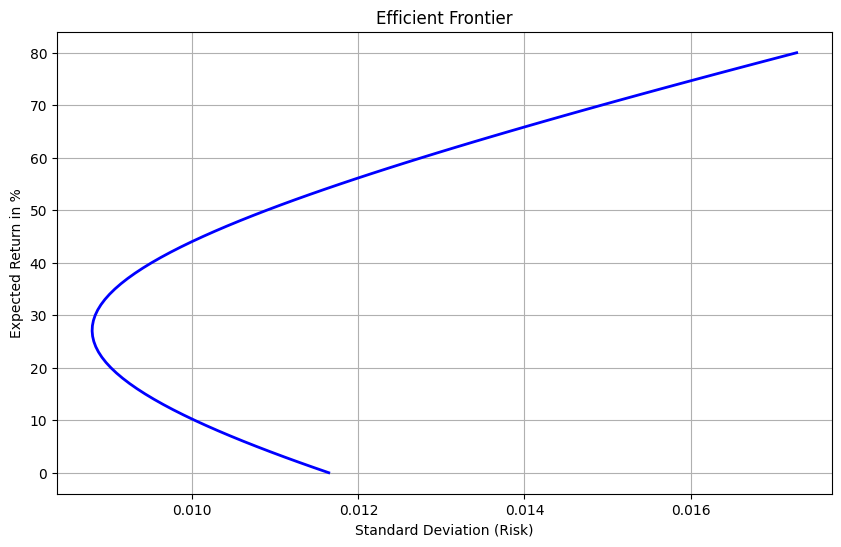

In [7]:
# Plotting the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(data_short['SDp'], data_short['ERp']*100, 'b-', linewidth=2)
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return in %')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()


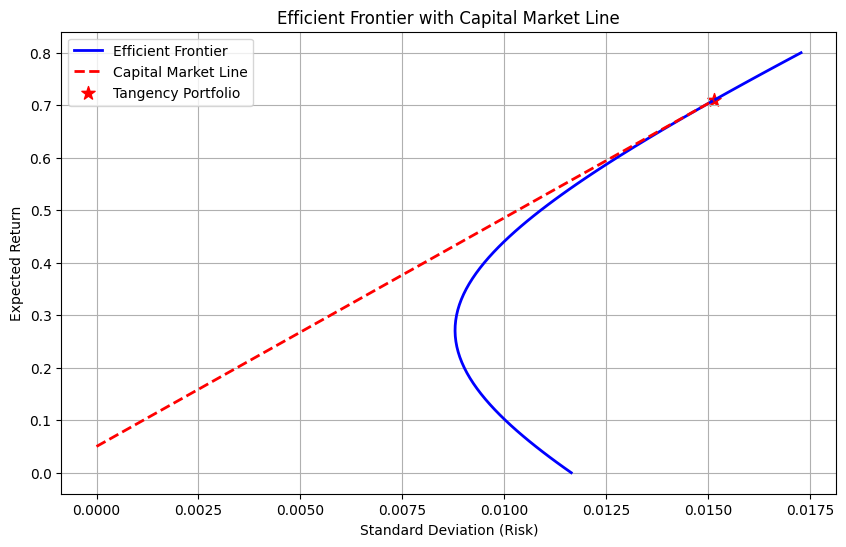

In [8]:
# Assuming 'risk_free_rate' is defined as the risk-free rate
risk_free_rate = 0.05

# Calculate the Sharpe ratio for each portfolio on the efficient frontier
data_short['SharpeRatio'] = (data_short['ERp'] - risk_free_rate) / (data_short['SDp'])

# Find the portfolio with the highest Sharpe ratio (tangency portfolio)
tangency_portfolio = data_short.loc[data_short['SharpeRatio'].idxmax()]

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(data_short['SDp'], data_short['ERp'], 'b-', linewidth=2, label='Efficient Frontier')

# Plot the Capital Market Line (CML)
cml_x = [0, tangency_portfolio['SDp']]
cml_y = [risk_free_rate, tangency_portfolio['ERp']]
plt.plot(cml_x, cml_y, 'r--', linewidth=2, label='Capital Market Line')

# Mark the tangency portfolio
plt.scatter(tangency_portfolio['SDp'], tangency_portfolio['ERp'], color='red', marker='*', s=100, label='Tangency Portfolio')

plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Capital Market Line')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
tangency_portfolio

SDp             0.015154
ERp             0.710000
x1              0.285400
x2              0.005600
x3              0.025200
x4             -0.123000
x5              0.251000
x6              0.050600
x7              0.052900
x8              0.068700
x9              0.393500
x10            -0.010000
SharpeRatio    43.552862
Name: 72, dtype: float64

In [10]:
data_short

,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,SharpeRatio
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.011643,0.00,-0.1662,0.0108,0.1353,0.2713,0.1760,0.0926,0.0228,0.0692,0.3423,0.0459,-4.294400
2,0.011461,0.01,-0.1598,0.0107,0.1338,0.2657,0.1771,0.0920,0.0232,0.0692,0.3430,0.0451,-3.490204
3,0.011282,0.02,-0.1535,0.0107,0.1322,0.2602,0.1781,0.0914,0.0236,0.0692,0.3437,0.0443,-2.659033
4,0.011108,0.03,-0.1471,0.0106,0.1307,0.2546,0.1792,0.0908,0.0241,0.0692,0.3444,0.0436,-1.800471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.016320,0.76,0.3172,0.0053,0.0174,-0.1507,0.2563,0.0477,0.0551,0.0687,0.3971,-0.0140,43.504956
78,0.016558,0.77,0.3236,0.0052,0.0159,-0.1563,0.2574,0.0471,0.0555,0.0687,0.3978,-0.0148,43.484399
79,0.016797,0.78,0.3299,0.0051,0.0143,-0.1619,0.2584,0.0465,0.0559,0.0687,0.3985,-0.0156,43.460935
80,0.017037,0.79,0.3363,0.0050,0.0128,-0.1674,0.2595,0.0459,0.0563,0.0686,0.3992,-0.0163,43.434837
